In [92]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


data = pd.read_csv("adm_data.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [93]:
data.columns = data.columns.str.strip()

data = data.rename(columns={"Serial No.": "Serial_No",
                        "GRE Score": "GRE_Score",
                        "TOEFL Score": "TOEFL_Score",
                        "University Rating": "University_Rating",
                        "Chance of Admit": "Chance_of_Admit"})

data.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Vypočítejte průměr a medián pro TOEFL skóre.

In [94]:
print(data["TOEFL_Score"].mean())
print(data["TOEFL_Score"].median())

107.41
107.0


Vypočítejte směrodatnou odchylku.

In [95]:
print(data["TOEFL_Score"].std())

6.069513777374126


Vytvořte histogram pro TOEFL skóre a nezapomeňte zobrazit odhadovanou křivku pravděpodobnostního rozdělení.

<Axes: xlabel='TOEFL_Score', ylabel='Count'>

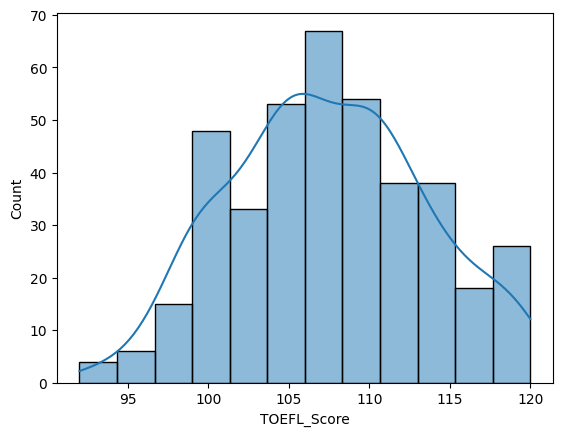

In [96]:
sns.histplot(data=data, x="TOEFL_Score", kde=True)

Otestujte, zda je TOEFL skóre vybráno z normálního rozdělení pomocí statistického testu. Uvažujte hladinu.

HO = Poskytnutá data mají normální rozdělení.
H1 = Poskytnutá data mají jiné rozdělení než normální.
hladina pravděpodobnosti = 0,05

In [97]:
stats.normaltest(data["TOEFL_Score"])

NormaltestResult(statistic=11.070212103496331, pvalue=0.003945790155853822)

pvalue < hladina pravděpodobnosti --> zamítáme H0 a přijímáme H1

Rozdělte data na studenty, kteří mají a nemají zkušenost s výzkumem.

In [98]:
vyzkum_ano = data[data["Research"] == 1]
vyzkum_ne = data[data["Research"] == 0]

Pro obě skupiny spočítejte průměrné GRE skóre.

In [99]:
print(vyzkum_ano["GRE_Score"].mean())
print(vyzkum_ne["GRE_Score"].mean())

322.85388127853884
309.49171270718233


Statisticky otestujte, zda existuje statisticky významný rozdíl v GRE skóre mezi těmito dvěma skupinami studentů. Vyberte správný test a nezapomeňte krátce okomentovat vyhodnocení testu.

In [100]:
stats.normaltest(vyzkum_ano["GRE_Score"])

NormaltestResult(statistic=10.539299481397224, pvalue=0.005145412486026274)

In [101]:
stats.normaltest(vyzkum_ne["GRE_Score"])

NormaltestResult(statistic=0.9962407495635873, pvalue=0.6076717821415272)

Obě skupiny dat nemají normálové rozdělení, proto je vhodné použí Mann Whitney U test.
H0 = GRE skóre mezi skupinou studentů, která prováděla svůj vlastní výzkum, a skupinou, která svůj vlastní výzkum neprováděla, je statisticky nevýznamný. 
H1 = GRE skóre mezi skupinou studentů, která prováděla svůj vlastní výzkum, a skupinou, která svůj vlastní výzkum neprováděla, je statisticky významný. 
hladina pravděpodobnosti = 0.05

In [102]:
stats.mannwhitneyu(vyzkum_ano["GRE_Score"], vyzkum_ne["GRE_Score"])

MannwhitneyuResult(statistic=33514.0, pvalue=1.1433386421648102e-32)

pvalue < hladina pravděpodobnosti --> zamítáme H0 a přijímáme H1

Vypočítejte korelaci mezi TOEFL skóre a GRE skóre.

In [103]:
data["TOEFL_Score"].corr(data["GRE_Score"])

0.8359768030143966

Jedná se o silně pozitivní korelaci - čím více se korelační koeficient blíží 1, tím silnější korelace je. To znamená že, pokud má studen vysoké skóre z TOEFL zkoušky, je vysoce pravděpodobné, že bude mít vysoké skóre i z GRE zkoušky.

Vytvořte korelační graf (sns.regplot) pro vysvětlovanou proměnnou šance na přijetí (Chance of Admit) a proměnnou, která je s ní nejvíce korelovaná.

In [104]:
data.corr()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial_No,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE_Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL_Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University_Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance_of_Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


S proměnou "Chance of Admit" nejvíce koreluje proměnná "CGPA".

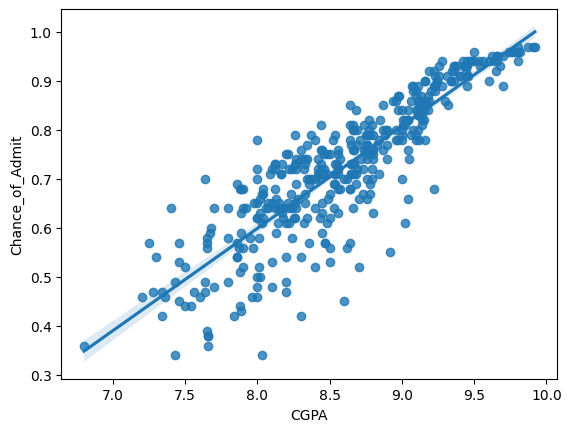

In [105]:
g = sns.regplot(data, x="CGPA", y="Chance_of_Admit")

Naší vysvětlovanou proměnnou bude šance na přijetí (Chance of Admit). Vytvořte boxplot pro tuto proměnnou, aby bylo možné vizuálně identifikovat případné odlehlé hodnoty.

<Axes: xlabel='Chance_of_Admit'>

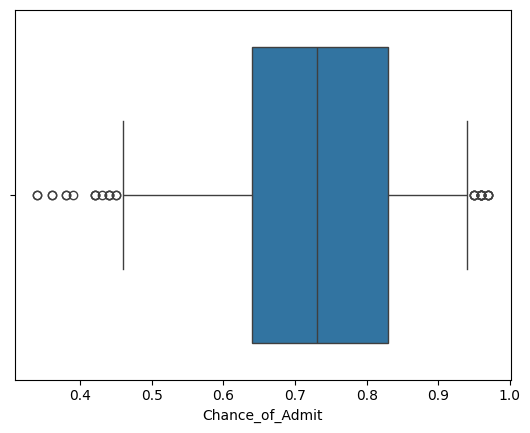

In [106]:
sns.boxplot(data, x="Chance_of_Admit", whis=[5, 95])

2. Odstraňte odlehlé pozorování na základě kritérií zjištěných z boxplotu.

In [107]:
Q05 = np.quantile(data["Chance_of_Admit"], 0.05)

In [108]:
Q95 = np.quantile(data["Chance_of_Admit"], 0.95)

In [109]:
outliers = data[(data["Chance_of_Admit"] < Q05) | (data["Chance_of_Admit"] > Q95)]

<Axes: xlabel='Chance_of_Admit'>

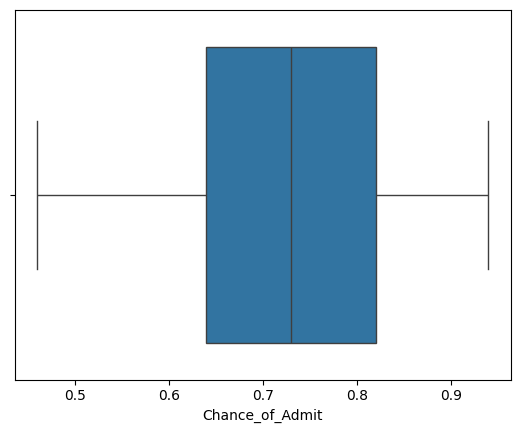

In [110]:
data_no_outliers = data[~((data["Chance_of_Admit"] < Q05) | (data["Chance_of_Admit"] > Q95))]

sns.boxplot(data_no_outliers, x="Chance_of_Admit")

Sestavte rovnici pro lineární regresi. Do rovnice zahrňte všechny proměnné, které dávají smysl.

In [111]:
from statsmodels.stats.outliers_influence import OLSInfluence

formula = "Chance_of_Admit ~ GRE_Score + TOEFL_Score + University_Rating + SOP + LOR + CGPA + Research"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Mon, 06 May 2024   Prob (F-statistic):          3.12e-134
Time:                        23:37:18   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2594      0.125    -10.097      0.000      -1.505      -1.014
GRE_Score             0.0017      0.001      2.906      0.004       0.001       0.003
TOEFL_Score           0.0029      0.001      2.680      0.008       0.001       0.005
University_Rating     0.0057      0.005      1.198      0.232      -0.004       0.015
SOP                  -0.0033      0.006     -0.594      0.553      -0.014       0.008
LOR                   0.0224      0.006      4.034      0.000       0.011       0.033
CGPA                  0.1189      0.012      9.734      0.000       0.095       0.143
Research              0.0245      0.008      3.081      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.895   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.191
Skew:                          -1.159   Prob(JB):                     4.52e-40
Kurtosis:                       5.344   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Odhadněte parametry lineárního regresního modelu.

Interpretujte koeficienty modelu. Které koeficienty jsou statisticky významné? Diskutujte, které proměnné mají největší vliv na šance na přijetí a proč.

Statisticky významé koeficienty: GRE Score, TOEFL Score, LOR, CGPA, Research
Největší vliv na přijetí mají: CGPA, poté také: Research a LOR

Vyhodnoťte kvalitu fitu vašeho lineárního regresního modelu pomocí koeficientu determinace R2.
R = 0.803 --> tzn. model dokáže vysvětlit přibližně 80% distribuce dat. Kvalita modelu je dostačující neboť se obvykle používají modely s R > 0.7

Spočítejte Cookovu vzdálenost pro jednotlivé body.

In [112]:
influence = OLSInfluence(res)
data["Cook Distance"] = influence.cooks_distance[0]
data.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Cook Distance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.000423
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.000771
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.002327
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.001616
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.000090


Vytvořte histogram pro Cookovu vzdálenost. Je potřeba nějaké body odstranit, protože by moc ovlivňovaly naši lineární regresi?

<Axes: xlabel='Cook Distance', ylabel='Count'>

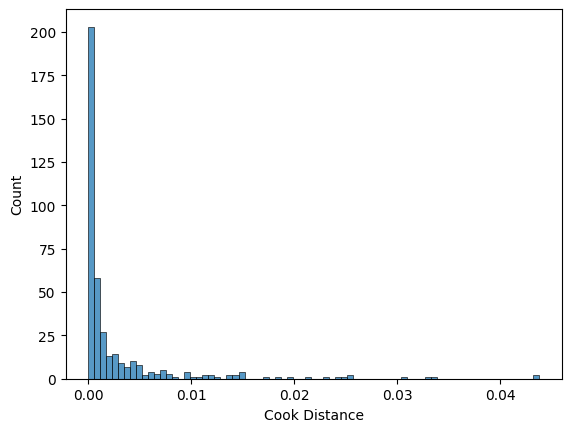

In [113]:
sns.histplot(data=data, x="Cook Distance")

Není potřeba odstranit žádné body, protože žádný z nich nepřekračuje Cookovu vzdálenost o více než 1.